# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## Contents
* [Introduction](#Introduction)
* [Data Validation](#Data-Validation)
* [Metric of Interest](#Metric-of-Interest)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Final Summary](#Final-Summary)

## **Introduction**
The purpose of this project is to provide a detailed report to the sales representative of _Pens and Printers_ (est. 1984) providing recommendations that the business should undertake, based on considerations described below and using the data provided by the sales representative's sales tracking system. In particular, the recommendations to be given are regarding the following three sales strategies for the company's new line of stationery:
* **Email:** Reaching out to customers through this strategy requires little work on the part of the team.
* **Phone call:** Reaching out to customers through this strategy requires the most work on the part of the team, with phone calls lasting roughly 30 minutes per customer.
* **Email and phone call:** When reaching out to customers through this strategy, phone calls last roughly 10 minutes per customer.

Once the dataset is fully validated, cleaned and prepared for analysis, a choice of metric will be made for the business to monitor, based on the dataset's content. Based on said metric, the dataset will be explored and analysis, with relevent findings shown through visualisations. Finally, all of these steps will be summarised into a few short conclusions, ending with recommendations on what approach the company should take, moving forward.

## **Data Validation**
The data in question is contained in the `product_sales.csv` file and should be checked against all of the information in the following table:

| Column Name | Details |
|-------------|---------------------------------------------------------|
| `week` | Week sale was made, counted as weeks since product launch |
| `sales_method` | Character, which of the three sales methods were used for that customer |
| `customer_id` | Character, unique identifier for the customer |
| `nb_sold` | Numeric, number of new products sold |
| `revenue` | Numeric, revenue from the sales, rounded to 2 decimal places |
| `years_as_customer` | Numeric, number of years customer has been buying from us (company founded in 1984) |
| `nb_site_visits` | Numeric, number of times the customer has visited our website in the last 6 months |
| `state` | Character, location of the customer i.e. where orders are shipped |

This is done using Python (the code is not directly shown in reader mode, but can be accessed for assessment outside reader mode). The following tasks are accomplished, in the order given:
1) _Validation of data types:_ The data types of all columns in the dataset were checked. It was found that only the `sales_method`, `customer_id` and `state` columns needed to have their data type changed, with the change being from the `object` to `string` data type. This was done to reflect the fact that the `sales_method`, `customer_id` and `state` columns are, inherently, strings, and that the `object` data type is generally ambiguous.
2) _Validation of values:_ The values of each column in the dataset were checked. In particular the following value checks were conducted:
    * No anomalies were detected in the `week` column of the dataset, whereupon no modifications were made.
    * The `sales_method` column of the dataset had $5$ distinct values. The two additional values detected, `"em + call"` and `"email"`, were modified to `"Email + Call"` and `"Email"`, respectively. This reduced the number of distinct values in the `sales_method` column of the dataset from $5$ to $3$, as expected.
    * No anomalies were detected in the `customer_id` column of the dataset, whereupon no modifications were made.
    * No anomalies were detected in the `nb_sold` column of the dataset, whereupon no modifications were made.
    * The `revenue` column the of the dataset was found to have null values. The details of how this is addressed are found in items **3.** and **4.**.
    * The `years_as_customer` column has largest value $63$, which, given that _Pens and Printers_ was established in 1984, would make the present year 2047, and not 2024. Because the scenario addressed in this project is a fictional one, **it will not be assumed that the present year therein is 2024**. Moreover, it is indeed possible, though arguably uncommon, for a someone to remain a customer for a company for over 60 years. On that note, no anomalies were detected, whereupon no modifications were made.
    * No anomalies were detected in the `nb_site_visits` column of the dataset, whereupon no modifications were made.
    * No anomalies were detected in the `state` column of the dataset, whereupon no modifications were made (all $50$ US states were found to have been correctly given with no spelling mistakes).
3) _Detection of null values:_ The dataset was checked for missing values. It was found that only the `revenue` column had missing values and, altogether, the rows with missing values accounted over $5\%$ of the dataset. For this reason the null values in the `revenue` column were imputed and were not dropped, so as to avoid bias in the resulting dataset.
4) _Imputation of null values:_ The `revenue` column of the dataset was imputed with the mean of all existing non-null values in the `revenue` values, grouped by the values in the `sales_method` column, prior. The reason for choosing the mean as the aggregate function for imputation is because it is less sensitive to outliers than the median and the mode, making the mean the best method for imputation when it comes to accounting for the overall distribution of the dataset. The reason for grouping by the `sales_method` column is to distinguish between the distribution of `revenue` within each of the different sales methods, enabling clearer comparisons between each of the methods, and thus being better able to determine which approach the company should take in that regard.

A variable `df` is defined and displayed below. The details of its relationship with the above steps, as well as the full Python code used for the data validation phase, can be seen by turning off reader mode.

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot styles for aesthetic reasons
palette = sns.color_palette("viridis_r", as_cmap=True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

# Load the product_sales.csv file as a pandas DataFrame object and assign the result to the df variable
df = pd.read_csv('product_sales.csv')

# Display df DataFrame to inspect the data
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


In [2]:
# Display the data types of the columns of the df DataFrame to determine whether or not the data types are validated
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [3]:
# Alter the data types of the columns of the df DataFrame to ensure that they correspond all of the information in the validation table above

df = df.astype({
    "sales_method" : "string",
    "customer_id" : "string",
    "state" : "string"
})

# Display the data types of the columns of the newly modified df DataFrame
df.dtypes

week                   int64
sales_method          string
customer_id           string
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 string
dtype: object

In [4]:
# Check the unique values in the sales_method of the df DataFrame
df["sales_method"].unique()

<StringArray>
['Email', 'Email + Call', 'Call', 'em + call', 'email']
Length: 5, dtype: string

In [5]:
# Modify the sales_method column of the df DataFrame by modifying "em + call" and "email" to "Email + Call" and "Email", respectively
df["sales_method"] = np.where(df["sales_method"] == "email", "Email", df["sales_method"])
df["sales_method"] = np.where(df["sales_method"] == "em + call", "Email + Call", df["sales_method"])

# Check the unique values in the sales_method of the df DataFrame once again
df["sales_method"].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [6]:
# Display the revenue column of the df DataFrame
df["revenue"]

0           NaN
1        225.47
2         52.55
3           NaN
4         90.49
          ...  
14995     50.82
14996     52.33
14997     34.87
14998     64.90
14999       NaN
Name: revenue, Length: 15000, dtype: float64

In [7]:
# Retireve the number of null values for each column of the df DataFrame
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [8]:
# Display the proportion of columns with missing values in the revenue column of the df DataFrame in percentage format and determine whether or not to drop them according to whether or not they account for 5% of the data or less.
n_rows_revenue_missing = int(df.isna().sum()["revenue"])
n_rows_total = df.shape[0]
proportion_rows_revenue_missing = n_rows_revenue_missing / n_rows_total
percentage_rows_revenue_missing = 100 * proportion_rows_revenue_missing
print(f"Percentage of rows with missing values in the revenue column: {percentage_rows_revenue_missing}%.")
print(f"Dropping those rows is appropriate: {percentage_rows_revenue_missing <= 5.00}.")

Percentage of rows with missing values in the revenue column: 7.16%.
Dropping those rows is appropriate: False.


In [9]:
# Impute the null values in the revenue column of the df DataFrame with the corresponding values of the revenue column of the aggregated_means DataFrame, rounded to 2 decimal places for uniformity and to reflect monetary values
df["revenue"] = df['revenue'].fillna(df.groupby('sales_method')['revenue'].transform('mean')).round(2)

# Retireve the number of null values for each column of the newly modified df DataFrame
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [10]:
# Display the revenue column of the df DataFrame
df["revenue"]

0         97.13
1        225.47
2         52.55
3         97.13
4         90.49
          ...  
14995     50.82
14996     52.33
14997     34.87
14998     64.90
14999    183.65
Name: revenue, Length: 15000, dtype: float64

## Metric of Interest
Having completed the data validation stage, a metric for the business to monitor must be decided upon. Given that one of a company's main goals is to generate profit, the most important metric to consider is the revenue generated by the company. Another important metric to consider is the time taken by a company to incorporate each of its approaches. For instance, although it is not explicitly shown in the dataset, the following is known about the different sales methods implemented by the company:
* **Email:** This takes little work on the part of the team, with the duration ostensibly less than 10 minuts per email per customer (although this is not certain).
* **Email + Call:** This takes a little more work on the part of the team, with calls lasting roughly 10 minutes per customer.
* **Call:** This takes the most work on the part of the team, with calls lasting roughly 30 minutes per customer.

Thus, the metric for the business to monitor shall be the revenue it generates, split by sales method, and any recommendations that the company should undertake shall be determined based on the following two criteria, in decreasing order of significance:
1) First and foremost, the sales method generating the most revenue should be adopted.
2) Secondly, if the sales method generating the most revenue is not also the least time-consuming one, then additional care should be taken to make sure that as much revenue is generated as possible without cosnuming too much of the team's time.

These two criteria, if followed, help ensure that the company can generate as much profit as possible for as little effort as necessary. The optimal approach that the business should undertake is the one which steers the company most closely in that direction.


## Exploratory Data Analysis
Having defined the metric of interest, the exploratory data analysis stage is then carried out. Based on the criteria determined earlier, the following visualisations, as well as their justifications, are reported, shown and later commented on (once again, the Python code can be accessed by turning off reader mode):
1) **Single-Variable Visualisations:**
- _Number of Customers Reached, Split by Sales Method:_ This visualisation is to determine the company's initial (i.e., current) situation when it comes to reaching out to customers, namely, to determine how many customers have been reached by sales method until the present moment. This is important to take into consideration in order to be able to determine what the company should change about its current approaches, if anything at all. Moreover, this is requested by the sales representative.

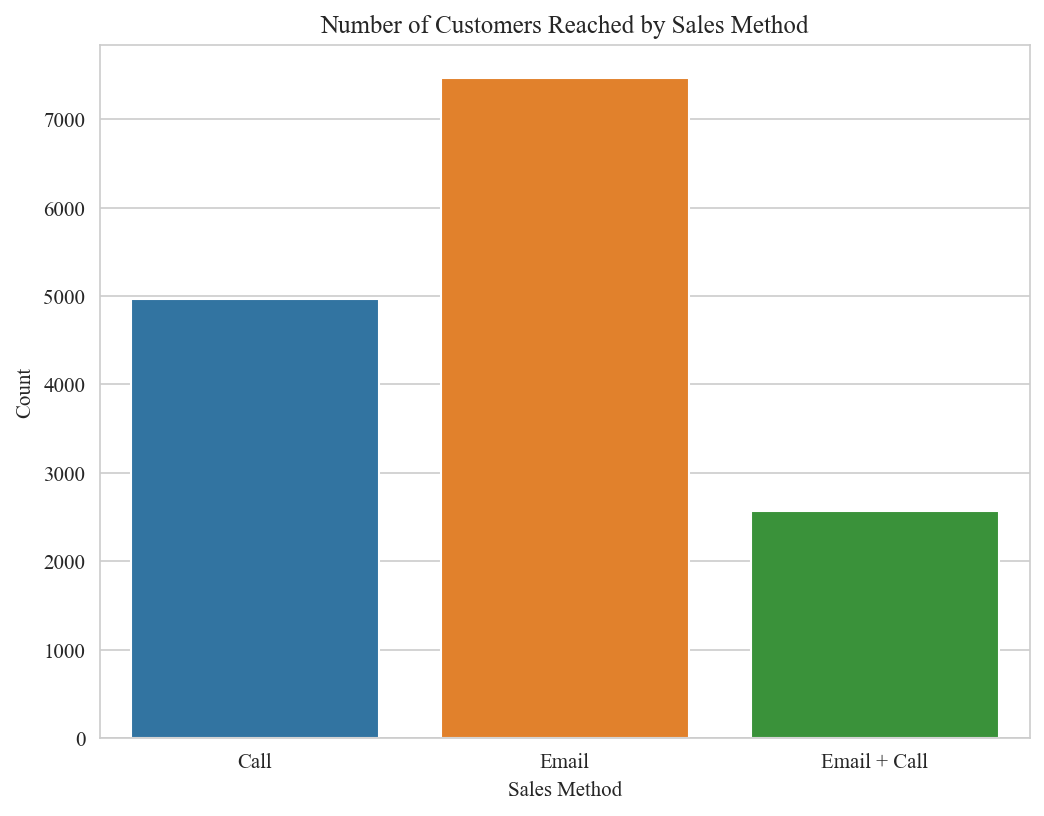

In [11]:
# Number of Customers Reached, Split by Sales Method
plt.figure(figsize = (8, 6), dpi = 150)
sns.barplot(data = df.groupby("sales_method").agg({"customer_id":"count"}), x = "sales_method", y = "customer_id", hue = "sales_method")
plt.xlabel("Sales Method")
plt.ylabel("Count")
plt.title("Number of Customers Reached by Sales Method")
plt.show()

There were, overall, $4962$ customers for the call-only sales method, $7466$ customers for the email-only sales method and $2572$ customers for the sales method incorporating both email and phone call.

* _Overall Revenue Distribution:_ This visualisation is to determine The overall distribution of the company's revenue. This is requested by the sales representative.

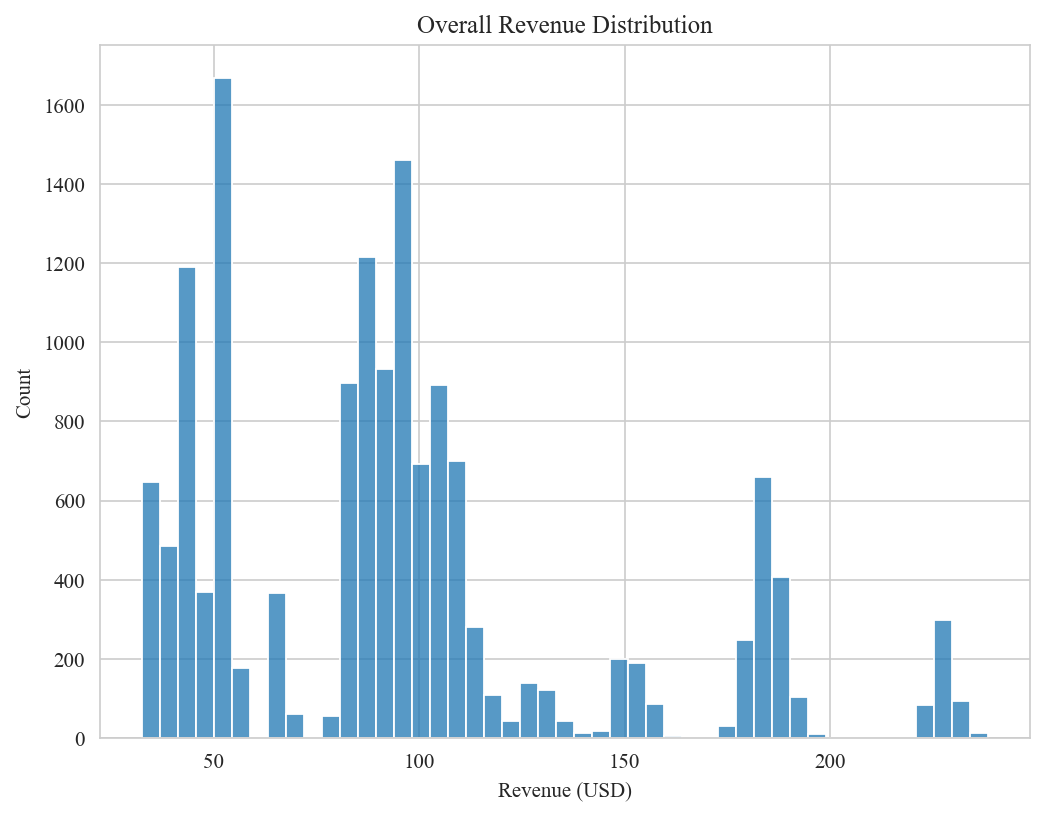

In [12]:
# Distribution of Years of Patronage of Customers
plt.figure(figsize = (8, 6), dpi = 150)
sns.histplot(data = df, x = "revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Count")
plt.title("Overall Revenue Distribution")
plt.show()

As per the histogram above, the overall revenue does not appear to be normally distributed, or have any outstanding distribution, for that matter. The spread of revenue, overall, looks like it has no significant feature. There may be additional factors to consider.

2) **Multi-Variable Visualisations:**
* _Revenue Distribution, Split by Sales Method:_ This visualisation is to determine whether or not the revenue generated by the company varies significantly across sales methods. This is important to take into consideration in order to determine which sales method generates the most revenue, and if the difference in revenue across sales methods is significant enough to warrant a change in the company's approach. Moreover, this is requested by the sales representative.

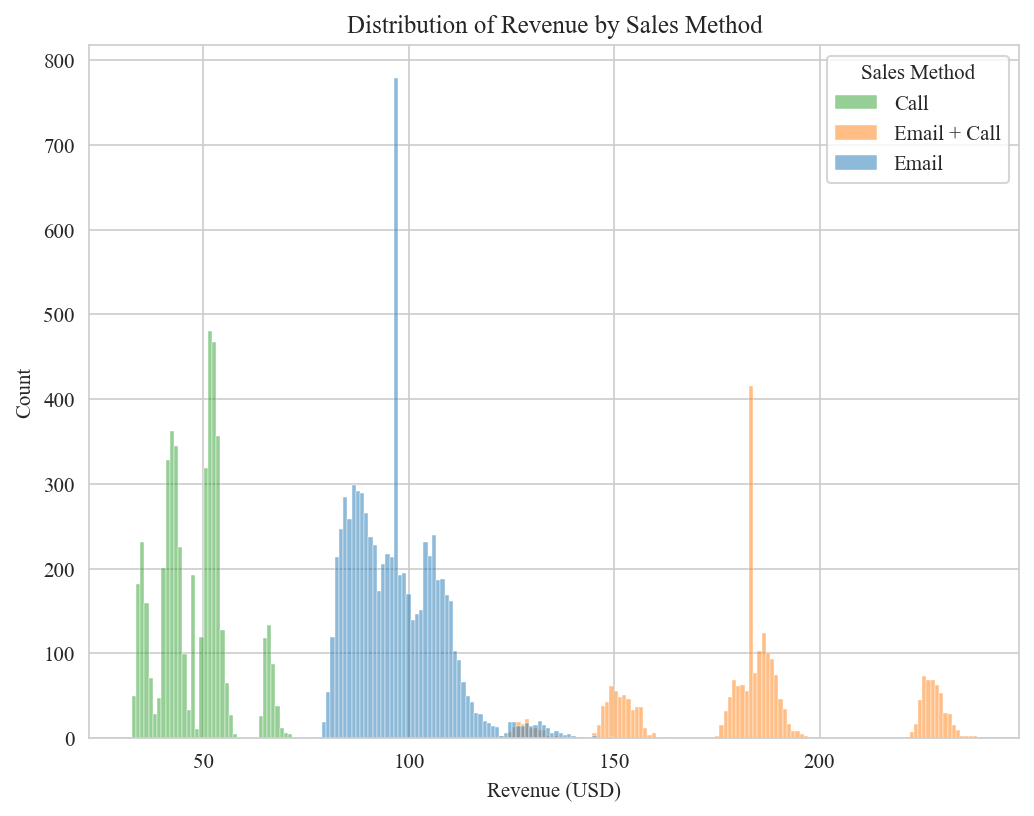

In [13]:
# Revenue Distribution, Split by Sales Method
plt.figure(figsize = (8, 6), dpi = 150)
sns.histplot(data = df, x = "revenue", hue = "sales_method", bins = 200)
plt.xlabel("Revenue (USD)")
plt.ylabel("Count")
plt.title("Distribution of Revenue by Sales Method")
plt.legend(title = "Sales Method", labels = ["Call", "Email + Call", "Email"])
plt.show()

From the histogram above, it is shown that the distribution of revenue varies significantly across sales methods. More specifically, there is little to no overlap between each the sales methods' revenue distributions, which may indicate that the sales method has a strong influence in the overall amount of revenue generated. In particular, the **Email + Call** method tends to generate the most revenue.

* _Revenue Over Time, Split by Sales Method:_ This visualisation is to determine whether or not the revenue generated by the company varies significantly across sales methods and over time. This is requested by the sales representative.

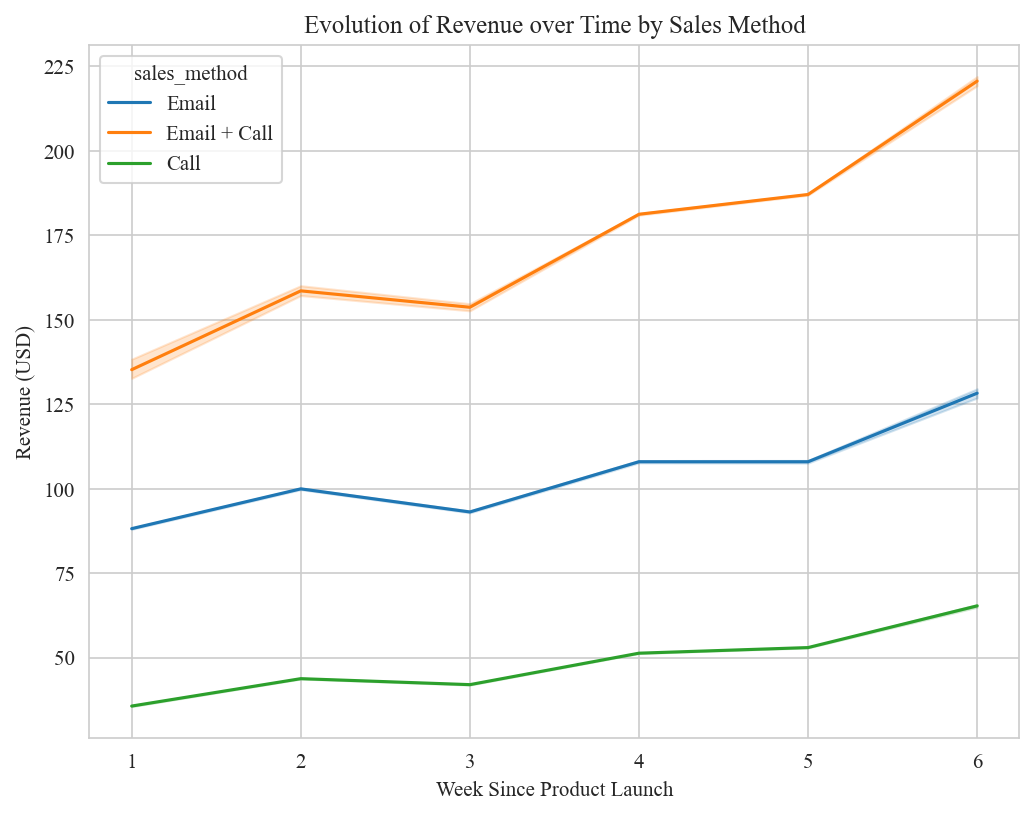

In [14]:
# Distribution of Years of Patronage of Customers
plt.figure(figsize = (8, 6), dpi = 150)
sns.lineplot(data = df, x = "week", y = "revenue", hue = "sales_method")
plt.xlabel("Week Since Product Launch")
plt.ylabel("Revenue (USD)")
plt.title("Evolution of Revenue over Time by Sales Method")
plt.show()

From the line plot above, it is shown that the **Email + Call** sales method consistently generates the most revenue over time.

Most notable are the following points of comparison, touched upon earlier:
* When calling customers without emailing them, calls last roughly 30 minutes per customer and the revenue generated from any resulting sales is lower than in all other sales methods.
* When calling customers after emailing them, calls last roughly 10 minutes per customer and the revenue generated from any resulting sales is higher than in all other sales methods, and significantly higher than in the call-only sales method.
* Thus, if the sales team were to focus more on emailing customers first, and then having a 10-minute call with them, as opposed to only having a 30-minute call with them, it can significantly increase the revenue generated from any resulting sales, while also saving valueable time (the sales team would have roughly saved an additional $70$ full days of work if they had adopted this approach prior to the present moment).

## Final Summary
In conclusion, the following has been established:
* When sending customers an email, and then calling each of them for roughly 10 minutes, the resulting sales generate the most revenue.
* When calling each customer for roughly 30 minutes, without emailing them, the resulting sales generate the least revenue.
* When emailing customers without calling them, the resulting sales generate revenue that typically lies between that generated by the other two sales methods.

Therefore, I recommend that the company take the following actions:
1) Completely abandon the call-only sales method, because it generates the least revenue and takes the most work on the team's part, offering no upside to the company when generating revenue.
2) Reach all customers who were previously contacted via the call-only method by sending them an email and then having a 10-minute phone call with them. This will not only save valueable time on the team's part, but will also generate significantly more revenue than through the other sales methods.
3) Wherever time permits, try to reduce the number of customers reached via the email-only sales method and consider reaching out to them by emailing them and then having a 10-minute phone call with each of them. Although this approach will take a little more work on the team's part, the increase in revenue that can be generated from resulting sales makes it well worth considering.

I hope that these three recommendations give a simple and actionable roadmap for how the company should move ahead, and I am very willing to correspond further about this, if need be.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation